In [2]:
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import skimage.io
from skimage.filters import median
from PIL import Image
import torch

In [3]:
from skimage.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity as ssim

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [5]:
images_collection = skimage.io.imread_collection(['/content/drive/MyDrive/Images/1min.jpg','/content/drive/MyDrive/Images/2min.jpg','/content/drive/MyDrive/Images/3min.jpg','/content/drive/MyDrive/Images/4min.jpg',
                                       '/content/drive/MyDrive/Images/5min.jpg','/content/drive/MyDrive/Images/6min.jpg','/content/drive/MyDrive/Images/11min.jpg'])

In [6]:
images_array_salt_pepper = np.array(images_collection)
original_images = np.array(images_collection)
print(original_images.shape)
np.max(original_images)

(7, 480, 640, 3)


255

In [ ]:
def add_noise(images_array_salt_pepper):
    row = 480
    col = 640

    # Randomly pick some pixels in the
    # image for coloring them white
    for i in range(7):
      for j in range(13000):

        # Pick a random y coordinate
        y_coord=np.random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=np.random.randint(0, col - 1)

        # Color that pixel to white
        images_array_salt_pepper[i][y_coord][x_coord][0] = 255
        images_array_salt_pepper[i][y_coord][x_coord][1] = 255
        images_array_salt_pepper[i][y_coord][x_coord][2] = 255


    # Randomly pick some pixels in the
    # image for coloring them black
    for i in range(7):
      for j in range(13000):

        # Pick a random y coordinate
        y_coord=np.random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=np.random.randint(0, col - 1)

        # Color that pixel to black
        images_array_salt_pepper[i][y_coord][x_coord][0] = 0
        images_array_salt_pepper[i][y_coord][x_coord][1] = 0
        images_array_salt_pepper[i][y_coord][x_coord][2] = 0

    return images_array_salt_pepper
noisy_images_salt_pepper = add_noise(images_array_salt_pepper)

In [ ]:
print(noisy_images_salt_pepper.shape)
np.max(noisy_images_salt_pepper)

(7, 480, 640, 3)


255

In [ ]:
def add_noise(noisy_images_salt_pepper):
      row = 480;
      col = 640;
      ch=3;
      mean = 5;
      var = 2000;
      sigma = var**0.5;
      # sigma = 20;
      noisy_img = np.zeros((7, 480, 640, 3));
      for i in range(7):
          gauss = np.random.normal(mean,sigma,(row,col,ch));
          gauss = gauss.reshape(row,col,ch);
          noisy = noisy_images_salt_pepper[i] + gauss;
          noisy_img[i] = noisy;
      return noisy_img;

noisy_images = add_noise(noisy_images_salt_pepper);


In [ ]:
print(noisy_images.shape)
np.max(noisy_images)

(7, 480, 640, 3)


486.20654371520266

Clipping the value between 0 to 255

In [ ]:
noisy_images = np.clip(noisy_images, 0, 255).astype(np.uint8)

In [ ]:
print(noisy_images.shape)
np.max(noisy_images)

(7, 480, 640, 3)


255

array([[[ 53,   1, 137],
        [ 53,   1, 137],
        [ 53,   1, 137],
        ...,
        [  8,  11,  90],
        [  0,   5,  62],
        [  1,  12,  58]],

       [[ 53,   1, 137],
        [ 53,   1, 137],
        [ 53,   1, 137],
        ...,
        [  0,   0,  84],
        [  9,  14,  82],
        [  0,   2,  59]],

       [[ 53,   1, 137],
        [ 53,   1, 137],
        [ 54,   0, 137],
        ...,
        [  0,   0, 105],
        [  7,   6,  99],
        [  3,   6,  87]],

       ...,

       [[ 41,   0, 125],
        [ 39,   0, 122],
        [ 36,   0, 117],
        ...,
        [ 40,   0, 144],
        [ 52,   0, 149],
        [ 53,   0, 147]],

       [[ 43,   0, 122],
        [ 40,   0, 121],
        [ 36,   0, 119],
        ...,
        [ 45,   0, 134],
        [ 61,   7, 144],
        [ 51,   0, 130]],

       [[ 43,   0, 120],
        [ 40,   0, 119],
        [ 37,   0, 119],
        ...,
        [ 56,   4, 138],
        [ 45,   0, 118],
        [ 63,   9, 133]]], dtype=uint8)
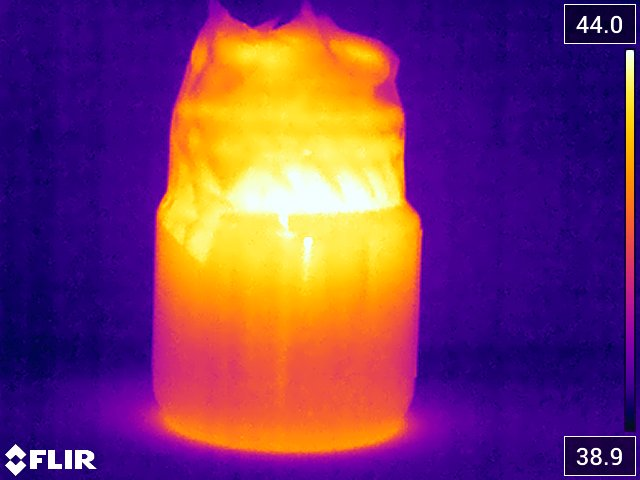

In [ ]:
original_images[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [ 53,   1, 137],
        ...,
        [  8,  11,  90],
        [  0,   5,  62],
        [  1,  12,  58]],

       [[ 53,   1, 137],
        [ 53,   1, 137],
        [ 53,   1, 137],
        ...,
        [  0,   0,  84],
        [  0,   0,   0],
        [  0,   2,  59]],

       [[ 53,   1, 137],
        [ 53,   1, 137],
        [ 54,   0, 137],
        ...,
        [  0,   0, 105],
        [  7,   6,  99],
        [  3,   6,  87]],

       ...,

       [[  0,   0,   0],
        [ 39,   0, 122],
        [ 36,   0, 117],
        ...,
        [ 40,   0, 144],
        [255, 255, 255],
        [ 53,   0, 147]],

       [[ 43,   0, 122],
        [ 40,   0, 121],
        [ 36,   0, 119],
        ...,
        [ 45,   0, 134],
        [ 61,   7, 144],
        [ 51,   0, 130]],

       [[ 43,   0, 120],
        [ 40,   0, 119],
        [ 37,   0, 119],
        ...,
        [ 56,   4, 138],
        [ 45,   0, 118],
        [ 63,   9, 133]]], dtype=uint8)
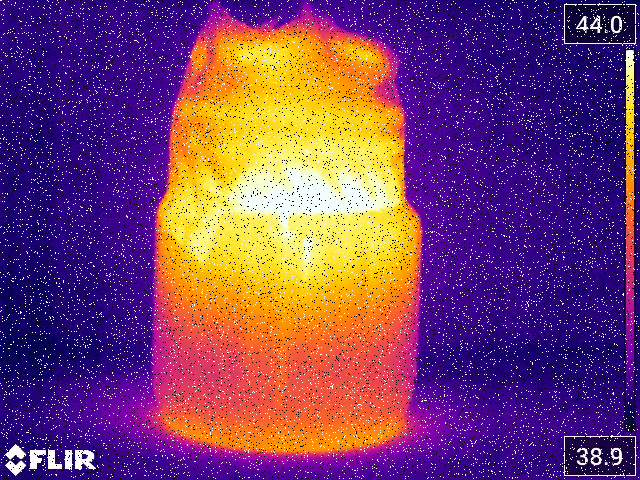

In [ ]:
noisy_images_salt_pepper[0]

array([[[255, 255, 255],
        [234, 246, 205],
        [  0,   0, 159],
        ...,
        [ 11,   0,  18],
        [ 83,   0, 104],
        [ 12,   0,   0]],

       [[  0,  30,  91],
        [125,   8, 138],
        [ 55,   6, 174],
        ...,
        [  6,   0,  49],
        [ 32,  26,   0],
        [ 49,   0,  74]],

       [[ 62,  31,  71],
        [120,   0,  69],
        [ 74,   0, 122],
        ...,
        [ 69,   7,  31],
        [  0,   0, 119],
        [ 11,   0, 109]],

       ...,

       [[ 84,  36,  28],
        [ 44,   0,  80],
        [ 40,   0, 131],
        ...,
        [  0,   0, 105],
        [239, 247, 239],
        [ 76,   0, 214]],

       [[ 18,  44, 128],
        [  8,   0,  72],
        [  4,  55, 141],
        ...,
        [108,   0, 145],
        [133,  10, 128],
        [177,  58, 141]],

       [[ 43,  71, 128],
        [  0,   0,  80],
        [ 50,  33, 200],
        ...,
        [  0,   3, 108],
        [ 29,  80, 205],
        [ 99,   0,  62]]], dtype=uint8)
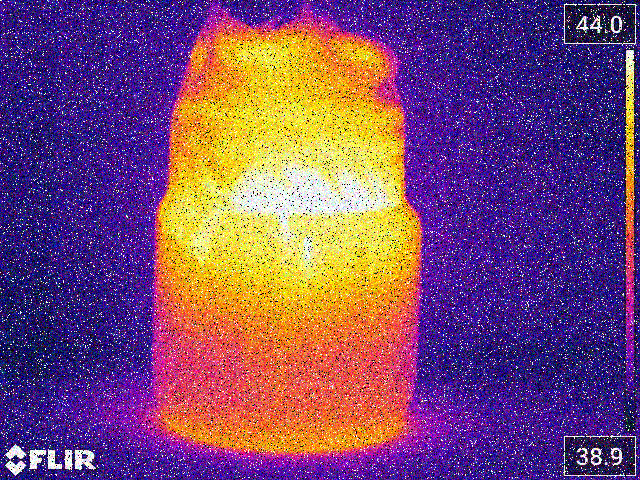

In [ ]:
noisy_images[0]

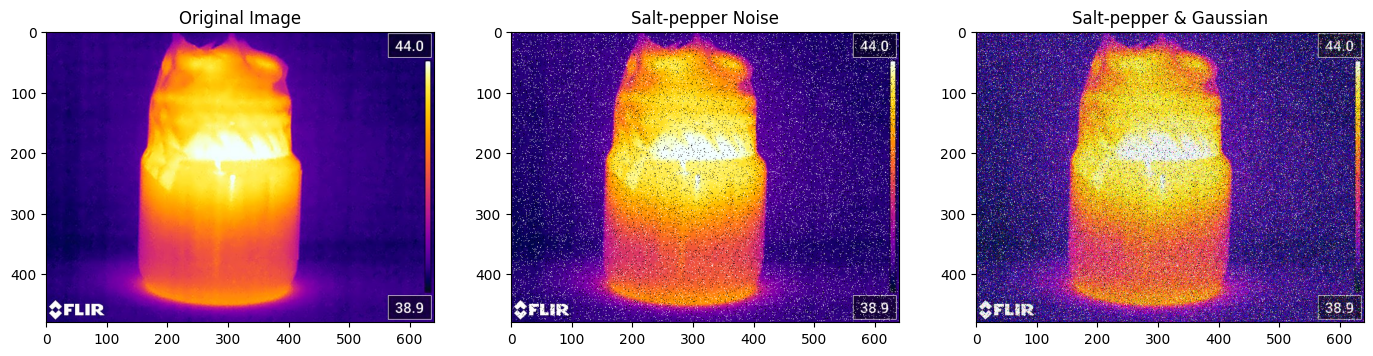

In [ ]:
plt.figure(figsize=(17,21))
x1 = plt.subplot(131)
x1.set_title("Original Image")
plt.imshow(original_images[0])
x2 = plt.subplot(132)
x2.set_title("Salt-pepper Noise")
plt.imshow(noisy_images_salt_pepper[0])
x3 = plt.subplot(133)
x3.set_title("Salt-pepper & Gaussian")
plt.imshow(noisy_images[0])
plt.show()

Splitting train & testing dataset.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(noisy_images,original_images,train_size = 0.88,random_state = 1)

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = y_train.astype('float32') / 255
y_test = y_test.astype('float32') / 255

x_train = np.clip(x_train, 0., 1.)
x_test = np.clip(x_test, 0., 1.)
y_train = np.clip(y_train, 0., 1.)
y_test = np.clip(y_test, 0., 1.)

x_train[0][222][213][0]

1.0

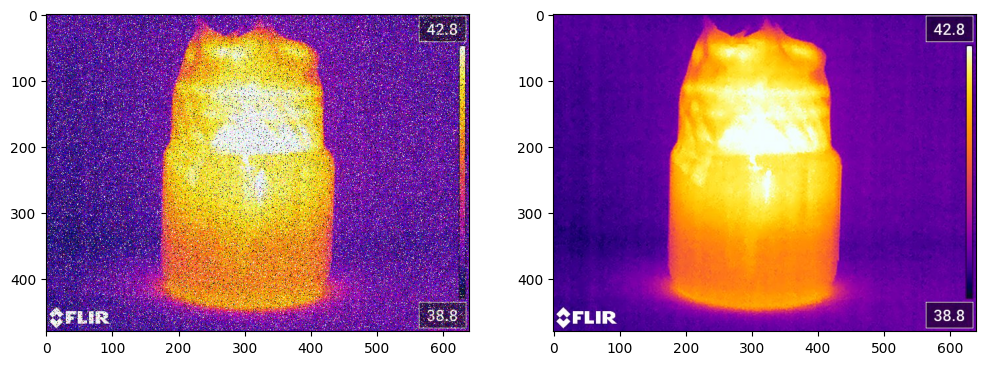

In [ ]:
plt.figure(figsize=(12,16))
plt.subplot(121)
plt.imshow(x_train[0])
plt.subplot(122)
plt.imshow(y_train[0])
plt.show()

Creating the Autoencoder model

In [ ]:
#Creating the model.
model = Sequential()
# Encoder
model.add(Conv2D(512, kernel_size=(3,3),activation='relu',input_shape=(480,640,3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
# Decoder
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

# Adding output layer
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 478, 638, 512)     14336     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 239, 319, 512)     0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 239, 319, 64)      294976    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 120, 160, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 120, 160, 64)      36928     
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 240, 320, 64)     

Training the model

In [ ]:
# Training the model.
model.fit(x_train,
          y_train,
          epochs=100,
          batch_size=1,
          shuffle=True,
          validation_data=(x_test, y_test)
          )


Epoch 1/100
6/6 [==============================] - 3s 211ms/step - loss: 0.2222 - accuracy: 0.6482 - val_loss: 0.0715 - val_accuracy: 0.6192
Epoch 2/100
6/6 [==============================] - 1s 176ms/step - loss: 0.0438 - accuracy: 0.6803 - val_loss: 0.0390 - val_accuracy: 0.9436
Epoch 3/100
6/6 [==============================] - 1s 176ms/step - loss: 0.0290 - accuracy: 0.9430 - val_loss: 0.0153 - val_accuracy: 0.9366
Epoch 4/100
6/6 [==============================] - 1s 174ms/step - loss: 0.0238 - accuracy: 0.9350 - val_loss: 0.0137 - val_accuracy: 0.9429
Epoch 5/100
6/6 [==============================] - 1s 174ms/step - loss: 0.0188 - accuracy: 0.9426 - val_loss: 0.0116 - val_accuracy: 0.9439
Epoch 6/100
6/6 [==============================] - 1s 174ms/step - loss: 0.0147 - accuracy: 0.9362 - val_loss: 0.0100 - val_accuracy: 0.9466
Epoch 7/100
6/6 [==============================] - 1s 177ms/step - loss: 0.0111 - accuracy: 0.9475 - val_loss: 0.0086 - val_accuracy: 0.9503
Epoch 8/100
6

Prediction

In [ ]:
# Prediction
no_noise_img = model.predict(noisy_images)

1/1 [==============================] - 0s 22ms/step


In [ ]:
print(no_noise_img.shape)
np.max(no_noise_img)

(7, 480, 640, 3)


349.47342

In [ ]:
no_noise_imgs = np.clip(no_noise_img, 0, 255).astype(np.uint8)

array([[[ 36,   0,  60],
        [ 52,   0,  81],
        [ 60,   0,  91],
        ...,
        [ 42,   0,  66],
        [ 29,   0,  50],
        [ 20,   0,  32]],

       [[ 51,   0,  80],
        [ 58,   0,  92],
        [ 65,   0,  98],
        ...,
        [ 58,   0,  89],
        [ 43,   0,  75],
        [ 29,   0,  51]],

       [[ 54,   0,  86],
        [ 57,   0,  94],
        [ 63,   0,  97],
        ...,
        [ 28,   0,  65],
        [ 28,   0,  63],
        [ 29,   0,  54]],

       ...,

       [[ 27,   0,  62],
        [ 36,   0,  80],
        [ 34,   0,  81],
        ...,
        [ 61,   0,  95],
        [ 92,   0, 105],
        [ 84,   0,  93]],

       [[ 21,   0,  54],
        [ 31,   0,  75],
        [ 30,   0,  77],
        ...,
        [ 83,   0, 101],
        [113,   0, 114],
        [ 95,   0,  93]],

       [[ 10,   0,  34],
        [ 19,   0,  56],
        [ 22,   0,  62],
        ...,
        [ 94,   0, 102],
        [106,   0, 103],
        [ 84,   0,  78]]], dtype=uint8)
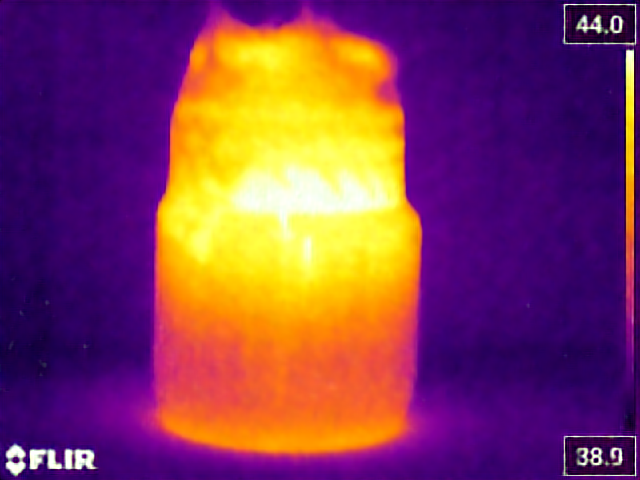

In [ ]:
no_noise_imgs[0]

In [ ]:
# no_noise_imgs = no_noise_imgs/251.
# no_noise_imgs = np.clip(no_noise_imgs,0.,1.)

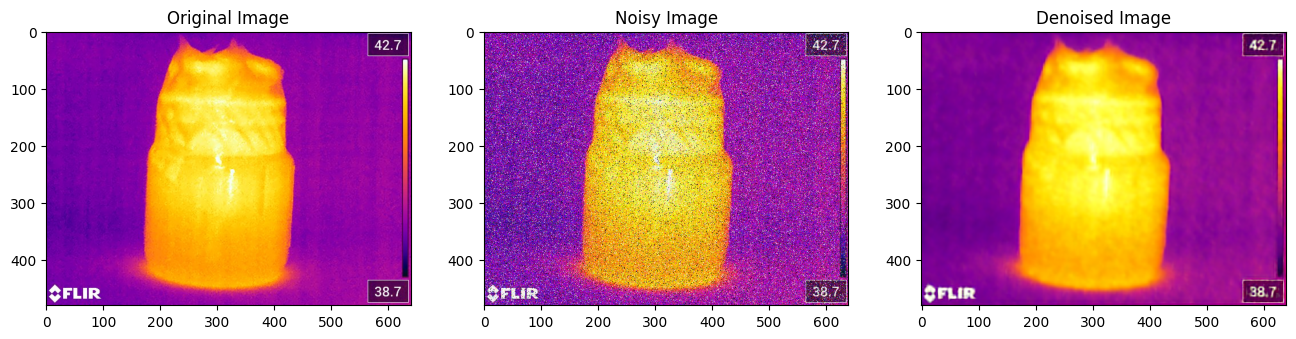

In [ ]:
plt.figure(figsize=(16,21))
x1 = plt.subplot(131)
x1.set_title("Original Image")
plt.imshow(original_images[5])
x2 = plt.subplot(132)
x2.set_title("Noisy Image")
plt.imshow(noisy_images[5])
x3 = plt.subplot(133)
x3.set_title("Denoised Image")
plt.imshow(no_noise_imgs[5])
plt.show()

Parameter Estimation

In [ ]:
img_true = original_images[5]
img_denoised = no_noise_imgs[5]

In [ ]:
print(img_true.shape)
print(img_denoised.shape)

(480, 640, 3)
(480, 640, 3)


In [ ]:
img_true = img_true.reshape(-1)
img_denoised = img_denoised.reshape(-1)

In [ ]:
print(img_true.shape)
print(img_denoised.shape)

(921600,)
(921600,)


In [ ]:
mse = mean_squared_error(img_true, img_denoised)
print(mse)

190.12565972222222


In [ ]:
# psnr = peak_signal_noise_ratio(original_images[0], no_noise_imgs[0])
# print(psnr)

In [ ]:
psnr = peak_signal_noise_ratio(img_true, img_denoised)
print(psnr)

25.340396268339504


In [ ]:
sim = ssim(img_true, img_denoised)
print(sim)

0.9794538607747514


In [ ]:
print(f'MSE: {mse:.2f}')
print(f'PSNR: {psnr:.2f}')
print(f'SSIM: {sim:.2f}')

MSE: 190.13
PSNR: 25.34
SSIM: 0.98


In [ ]:
model_save_name = 'final_model'
path = F"/content/drive/MyDrive/{model_save_name}"
# torch.save(model.state_dict(), path)
model.save_weights(path)

In [7]:
model_save_name = 'final_model'
path = F"/content/gdrive/My Drive/{model_save_name}"
model.load_state_dict(torch.load(path))

NameError: name 'model' is not defined